# Networking

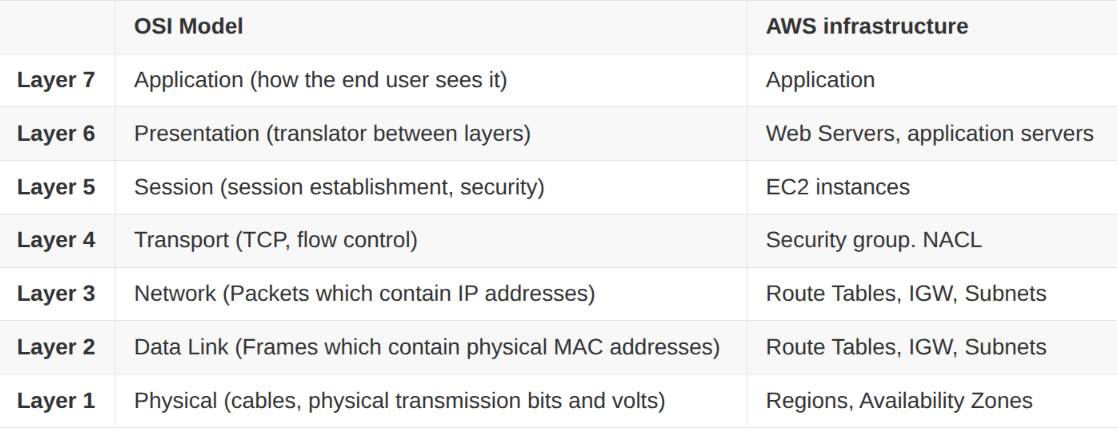

## Introduction to Networking

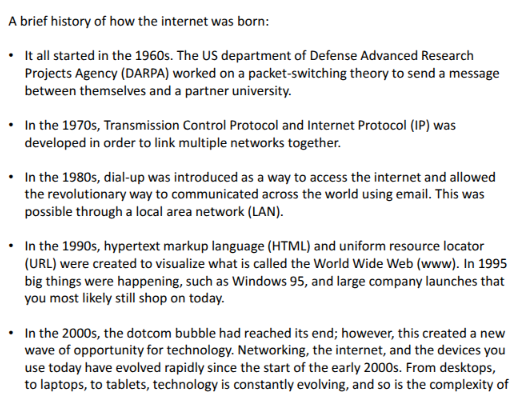

### Computer Network

- A collection of computing devices logically connected together to share its resources.
- It has a **node** represented by the devices (computers, routers, switches). The **host** is a node with a unique function that all other nodes connect to it, like a server.

### Basic Computer Network

- Computers are connected through a **Network Interface Card**, where the traffic is routed through a **switch**. The switch is the identity of the network itself.

- For one network to connect/communicate to other network, it should have its own **router** as a default gateway for other networks to communicate with your own. This is commonly used to connect to **The Internet**.

### Data

- Anything that stores infromation (pictures, documents, code, etc.)
- Can be decomposed into bits and bytes.

### OSI Model Units

- **Physical** - bits
- **Data-Link** - frames
- **Network** - packets
- **Transport** - segments

### Encapsulation and Decapsulation

- **Encapsulation** - Data --> Bits
- **Decapsulation** - Bits --> Data

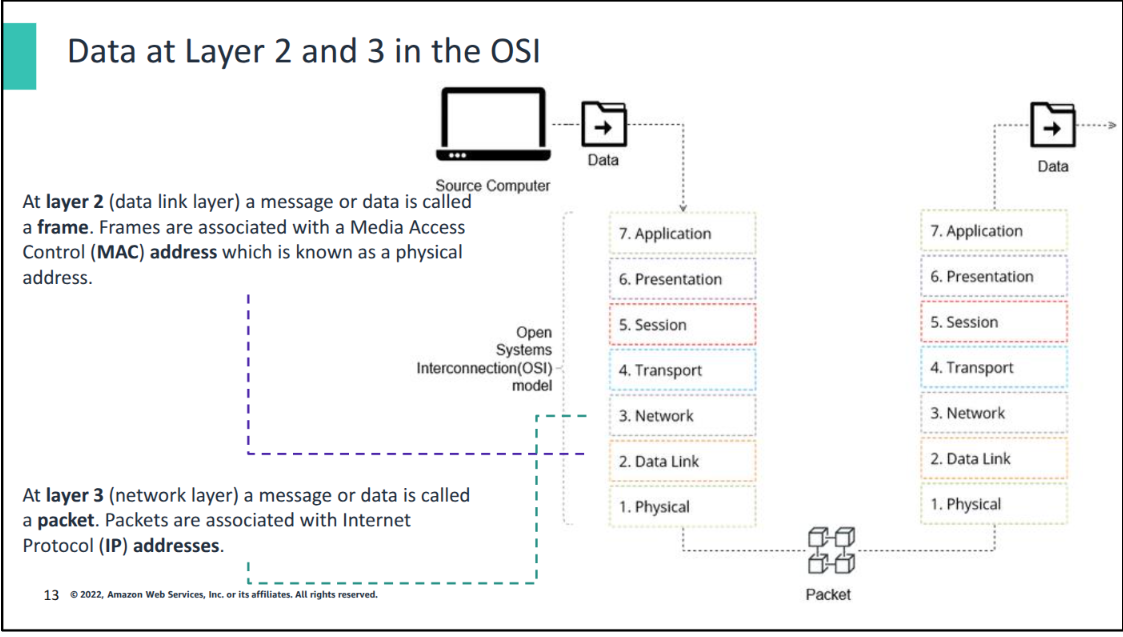

### Networking Components

1. **Client** - Computer that allows users to accss data in a network. It makes request to a **server**.
2. **Server** - Provides the response to a resource requested by a client.
3. **NIC** - Connects the computer to a network. Has its own *Media Access Control* (MAC) Address.
    - A **MAC Address** is a unique hardware identifier used to identify the sender and receiver of data
    - `ABC DEF GHI 123 456 789` is how it is formatted
    - `ABC DEF GHI` is the **OUI** (Organizationally Unique Identifier)
    - `123 456 789` is assigned to the NIC by the manufacturer
4. **Network Cables** - Physically connects networks together.
    
    - **Fiber Optic** - Transmits lights instead of electricity therefore it is faster. Used for areas with high EMI and can transmit over long ranges.
    - **Coaxial** - Being replaced by fiber optic. Copper wire in the middle with a metal braided shield.
    - **Twisted-[air** - Most common for computer, telephone, network cable. Aka an **ethernet cable**. Either shielded or unshielded.

    | Cable Type        | Usage                                  | Distance | Speed        |
    | ----------------- | -------------------------------------- | -------- | ------------ |
    | UTP (Cat5e/6/7/8) | LANs, Internet connections             | \~100 m  | Up to 40Gbps |
    | STP               | LANs in high-interference areas        | \~100 m  | Up to 40Gbps |
    | Coaxial           | Broadband, older Ethernet              | \~500 m  | Up to 10Gbps |
    | Fiber Optic (SMF) | Long-distance backbone                 | >100 km  | Tbps+        |
    | Fiber Optic (MMF) | Data centers, short backbone links     | \~2 km   | Tbps+        |
    | Crossover (UTP)   | Direct device-to-device (older method) | \~100 m  | Same as UTP  |

    *See also*: RJ45 Connector

5. **Switch** - Connnects all the nodes of a network together. Every device connects to its port using the NIC. Other switches connect through it via a router or a single cable.
    - Transmits data to only the receiving device via the MAC (Layer 2 device).
    - See also *Spanning Tree Protocol*.

6. **Router** - Connects multiple network segments into one network.
    - Connects multiple siwthces/network to form a larger newtork.
    - Filters the data that goes through it (via the **Internet Protocol**), which enables data to be routed differently.
    - Operates at layer 2 and 3 of the OSI.
    - Has its own dedicated **Routing Table**.

7. **Modem** - Connects your home to the internet. One port connects your modem to the outside internet, and the other to your router.

### BONUS: RJ45 Connector

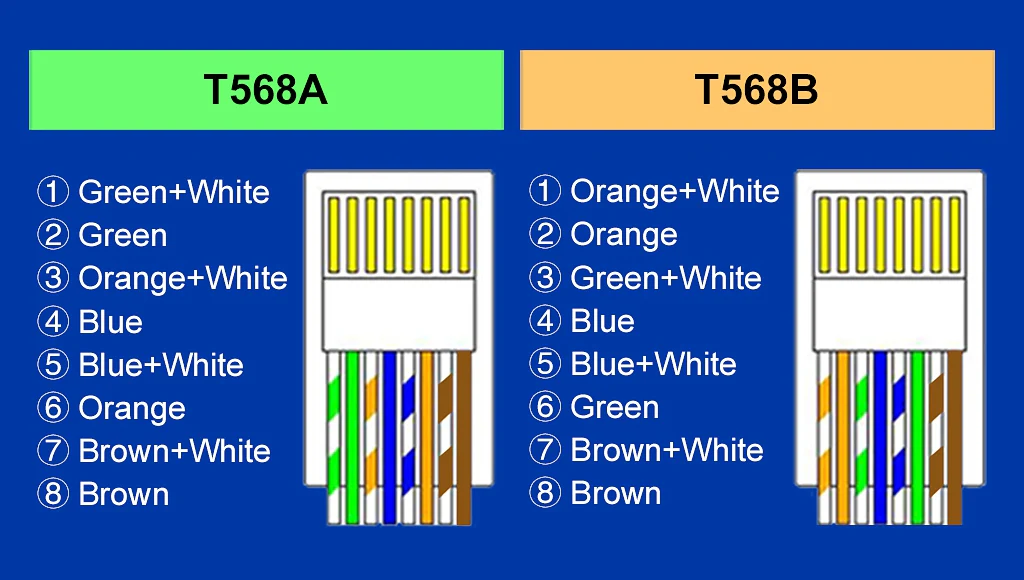

#### Connection Types of RJ45

| **Cable Type**               | **Connection**                                | **Use Case**                                                                                                                                                   |
| ---------------------------- | --------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Straight-through**         | PC → Switch/Hub/Router                        | Used to connect **different types of devices** (e.g., computer to switch, switch to router).                                                                   |
| **Crossover**                | PC ↔ PC, Switch ↔ Switch, Router ↔ Router     | Used to connect **similar devices** directly (e.g., computer to computer without a switch). Now mostly obsolete because modern NICs support **Auto-MDI/MDIX**. |
| **Rollover (Console Cable)** | PC (serial port) → Router/Switch console port | Used for **device management**. Allows administrators to configure network devices via console/terminal access.                                                |


### BONUS: [Routing Table](https://www.geeksforgeeks.org/computer-networks/routing-tables-in-computer-network/)

- A routing table is a data structure stored in a router or a host (computer/server) that tells the device where to forward packets based on their destination IP address.

#### Essential Information about Routing Table

- **Entries**: Each row in the table is a route.

- **Fields** (common ones):

    - **Destination Network** – IP range of the destination.
    - **Subnet Mask** – Defines the size of the destination network.
    - **Next Hop** – The IP address of the next router to forward the packet to.
    - **Interface** - The outgoing network interface (e.g., eth0).
    - **Metric/Cost** – The “distance” or preference for that route (lower = better).

- **Types of routes**:

    - **Directly Connected Routes** – Networks the router is directly connected to.
    - **Static Routes** – Manually added by administrators.
    - **Dynamic Routes** – Learned automatically using routing protocols (OSPF, RIP, BGP, etc.).
    - **Default Gateway/Route (0.0.0.0/0)** – Used if no other specific route matches (like a "catch-all").

#### Example:

| Destination | Subnet Mask   | Next Hop   | Interface | Metric |
| ----------- | ------------- | ---------- | --------- | ------ |
| 192.168.1.0 | 255.255.255.0 | — (Direct) | eth0      | 0      |
| 192.168.2.0 | 255.255.255.0 | — (Direct) | eth1      | 0      |
| 10.0.0.0    | 255.255.255.0 | — (Direct) | eth2      | 0      |
| 0.0.0.0     | 0.0.0.0       | 10.0.0.254 | eth2      | 1      |

- If a packet is going to 192.168.1.x, it goes out eth0 directly.

- If a packet is going to 192.168.2.x, it goes out eth1 directly.

- If a packet is going to 10.0.0.x, it goes out eth2 directly.

- If a packet’s destination doesn’t match any of the above (e.g., going to the Internet 8.8.8.8), it uses the default route (0.0.0.0/0) and forwards the packet to 10.0.0.254 (the upstream router).


To view your routing table on Linux:
```bash
ip route show
```

### BONUS: Spanning Tree Protocol (IEEE 802.1D)

- Network Protocol used in Layer 2 (switching) to prevent loops in a network with redundant paths.
- Redundancy is good but loops are bad:
    - Ethernet frames can endlessly circulate
    - Switches can flood traffic uncontrollably
    - MAC Address table becomes unstable
- STP blocks some links while still keeping them as backups in case an active link fails.

#### How STP Works

STP builds a loop-free logical topology using these steps:

1. **Root Bridge Election**

    - Switches exchange Bridge Protocol Data Units (BPDUs).
    - The switch with the lowest Bridge ID (priority + MAC address) becomes the Root Bridge (central reference point).

2. **Path Cost Calculation**

    - Each switch calculates the lowest cost path to the Root Bridge.
    - Path cost depends on link speed (higher bandwidth = lower cost).

        | Link Speed | STP Cost (Default) |
        | ---------- | ------------------ |
        | 10 Mbps    | 100                |
        | 100 Mbps   | 19                 |
        | 1 Gbps     | 4                  |
        | 10 Gbps    | 2                  |

3. **Port Roles Assignment**

    - **Root Port (RP)** - The port on each non-root switch with the lowest cost path to the Root Bridge.

    - **Designated Port (DP)** - The port on each network segment that is chosen to forward frames toward the Root Bridge.

    - **Blocked Port (BP)** - Ports not selected as Root or Designated are placed in blocking state to prevent loops.

4. **Port States Transition** (classic STP):

    - **Blocking** - Listening only for BPDUs (no data forwarding).

    - **Listening** - Preparing to participate in STP.

    - **Learning** - Learning MAC addresses but not forwarding frames yet.

    - **Forwarding** - Normal operation, forwarding frames.

    - (Total convergence time: ~30–50 seconds in classic STP).

#### Variants of STP

- **STP (802.1D)** – Original, slow (30–50s convergence).

- **RSTP (802.1w)** – Rapid STP, faster convergence (~seconds).

- **MSTP (802.1s)** – Multiple Spanning Trees, allows VLANs to share STP instances.

- **PVST+ (Cisco)** – Per-VLAN STP, each VLAN runs its own STP instance.

## Networking Concepts

### Types of Computer Networks

- **Local Area Network** - Connects devices in a limited geographical area.
- **Wide Area Network** - Connect devices in a large geographical area.

### Physical Network Topologies

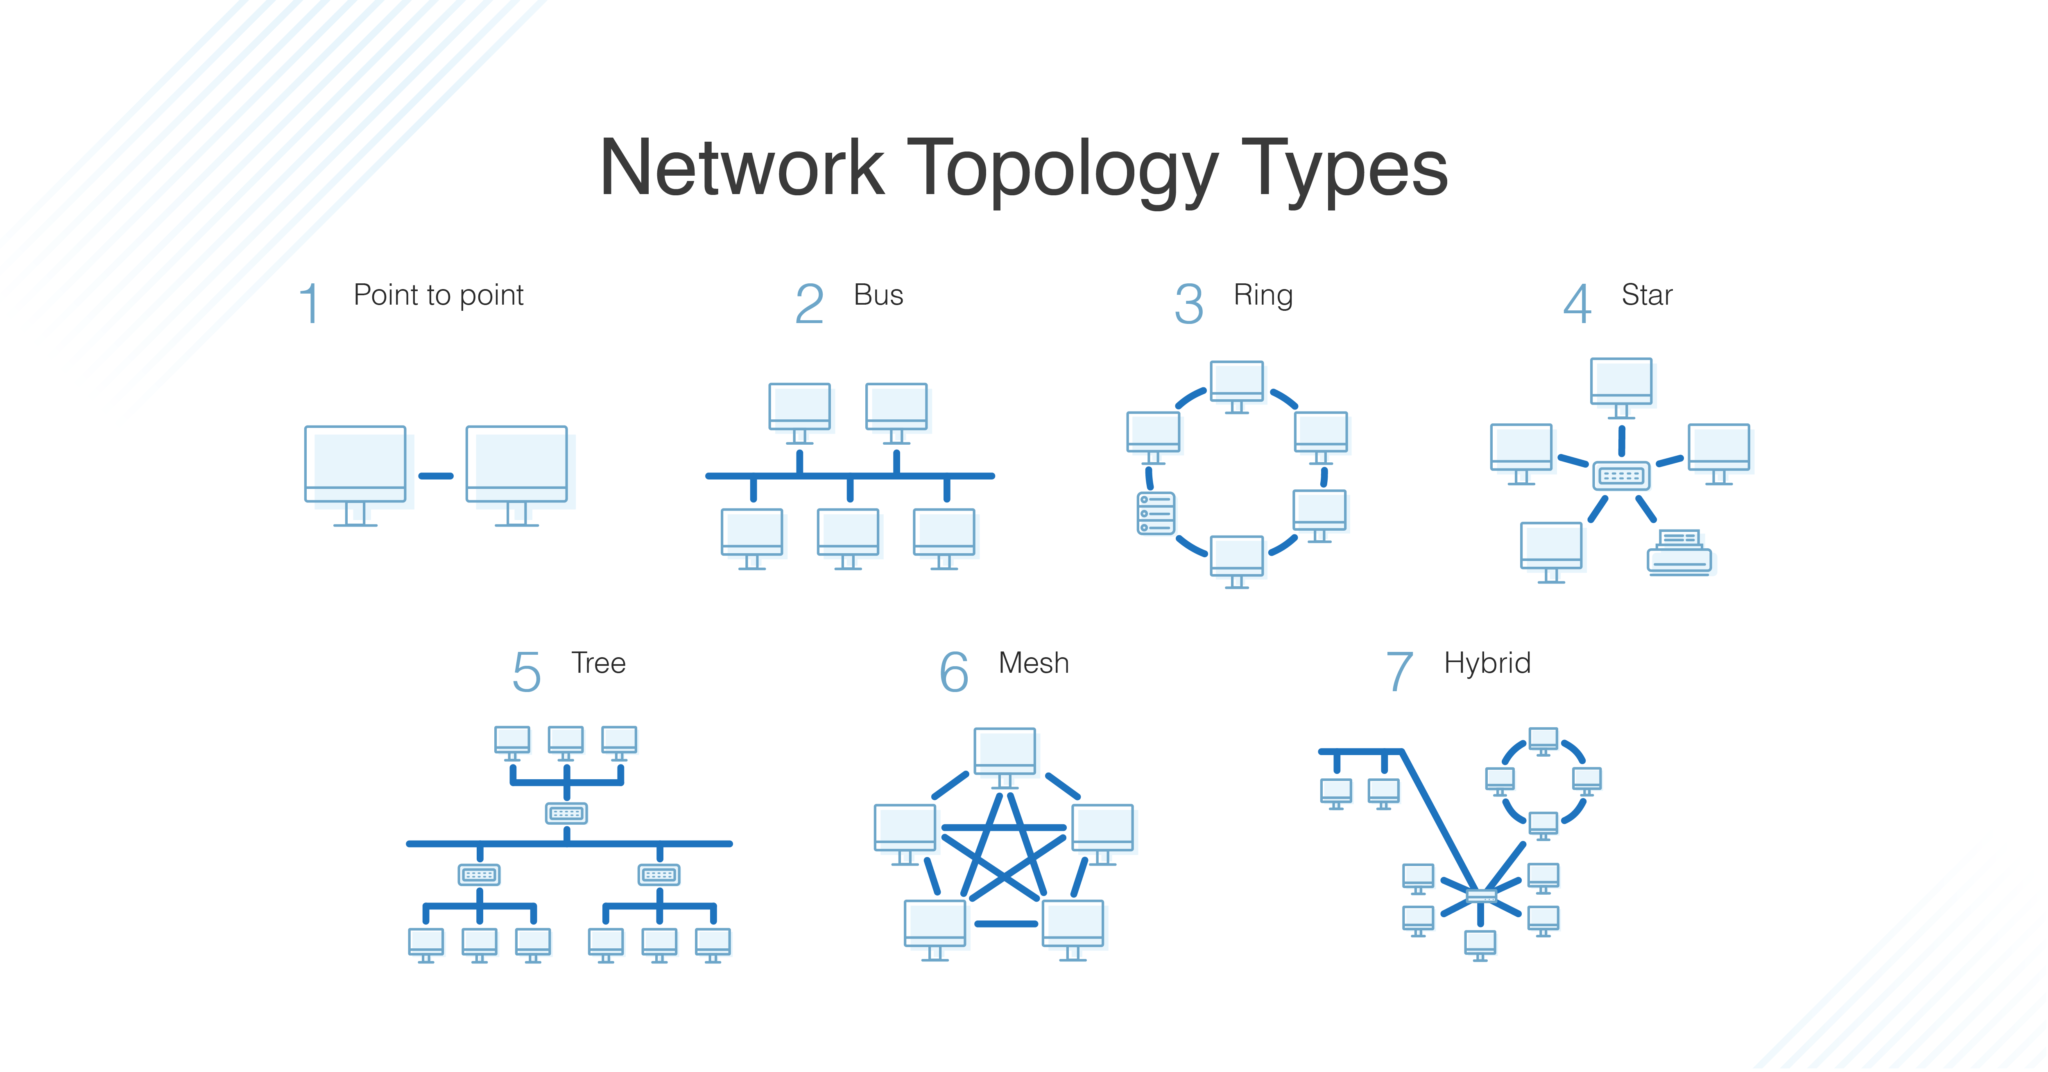

1. **Bus** - Positions all devices on a network along a single cable.
    - Allows only once computer to send a signal at a time, leading to network collisions.

2. **Star** - Every node is connected to one central switch using any of the three cable types.

3. **Mesh** - Nodes are interconnected. Can be full mesh or partial mesh.
    - **Partial-mesh** - All devices are connected to at least two other devices.

4. **Ring** - One System is connected to another, and the last system connects to the first. A failure at one point can mean failure to the rest of the system.
    - **Dual ring** - A second ring is connected such that if the main ring fails, another ring may still continue (redundancy and fault-tolerance).

5. **Tree** - Switches are connected via a main cable, where each swttch connects other devices.

6. **Hybrid** - Combines topologies with each other. The most common is **star-bus**.

### Logical Network Topologies

1. **Bus** - Moves data in **one** direction.

2.  **Star** - Data sent from any node will pass to the central switch. Switch also acts as a repeater to prevent data loss.

3. **Mesh** - A **full-mesh** connects all nodes and provides redundancy. It is expensive because each node needs multiple network adapters and cables. Used in *WAN*.

4. **Ring** - Ring sends data in either direction. One ring is used for redundancy.

5. **Tree** - Data sent to multiple switches, acting like a Star.

6. **VPC** - A virtual network allowing you to launch cloud resources that you define. Essentially, a logical network.

### Amazon VPC

- A virtual network that allows you to launch AWS resources that you define. 
- This VPC looks and works just like a normal network within a data center with the benefits of using AWS services for scalability.
- No maintenance required versus a dedicated data center.

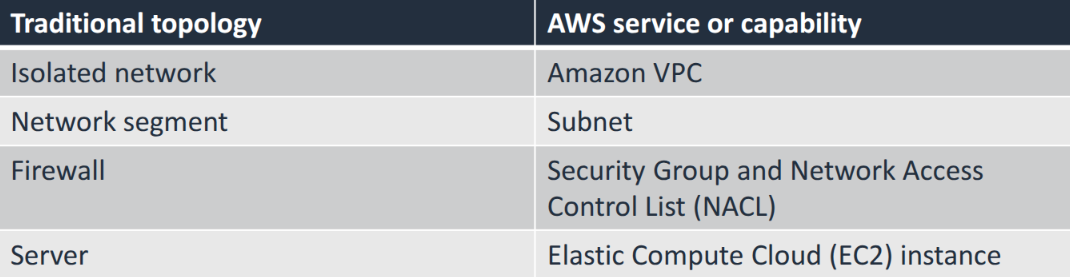

### Public vs Private Subnet

| **Aspect**          | **Public Subnet**                                     | **Private Subnet**                        |
| ------------------- | ----------------------------------------------------- | ----------------------------------------- |
| **Internet Access** | Directly accessible (with public IP)                  | Not directly accessible                   |
| **IP Type**         | Public IP addresses                                   | Private IP addresses                      |
| **Usage**           | Web servers, gateways, apps needing Internet exposure | Databases, backend apps, internal systems |
| **Security**        | More exposed, needs firewalls/security groups         | More secure by isolation                  |


### LAN vs AWS VPC

| **Aspect**        | **LAN (Local Area Network)**                               | **AWS VPC (Virtual Private Cloud)**                                      |
| ----------------- | ---------------------------------------------------------- | ------------------------------------------------------------------------ |
| **Scope**         | Small physical network (e.g., office, school, home).       | Virtual isolated network inside AWS cloud.                               |
| **Ownership**     | Owned and managed by you locally.                          | Provisioned and managed within AWS account.                              |
| **Connectivity**  | Devices connected via switches, routers, cables/Wi-Fi.     | AWS resources (EC2, RDS, Lambda, etc.) connected via subnets.            |
| **IP Addressing** | Typically private IP ranges (`192.168.x.x`, `10.x.x.x`).   | You choose private IP ranges (CIDR blocks). Can attach public IPs.       |
| **Security**      | Controlled via firewalls, ACLs, VLANs.                     | Controlled via Security Groups, NACLs, Route Tables.                     |
| **Use Case**      | Connecting computers, printers, IoT devices in a building. | Hosting cloud apps, databases, and services with controlled access.      |
| **Scenario**      | Office LAN for employees to share files & printers.        | A VPC with public subnet for web servers & private subnet for databases. |

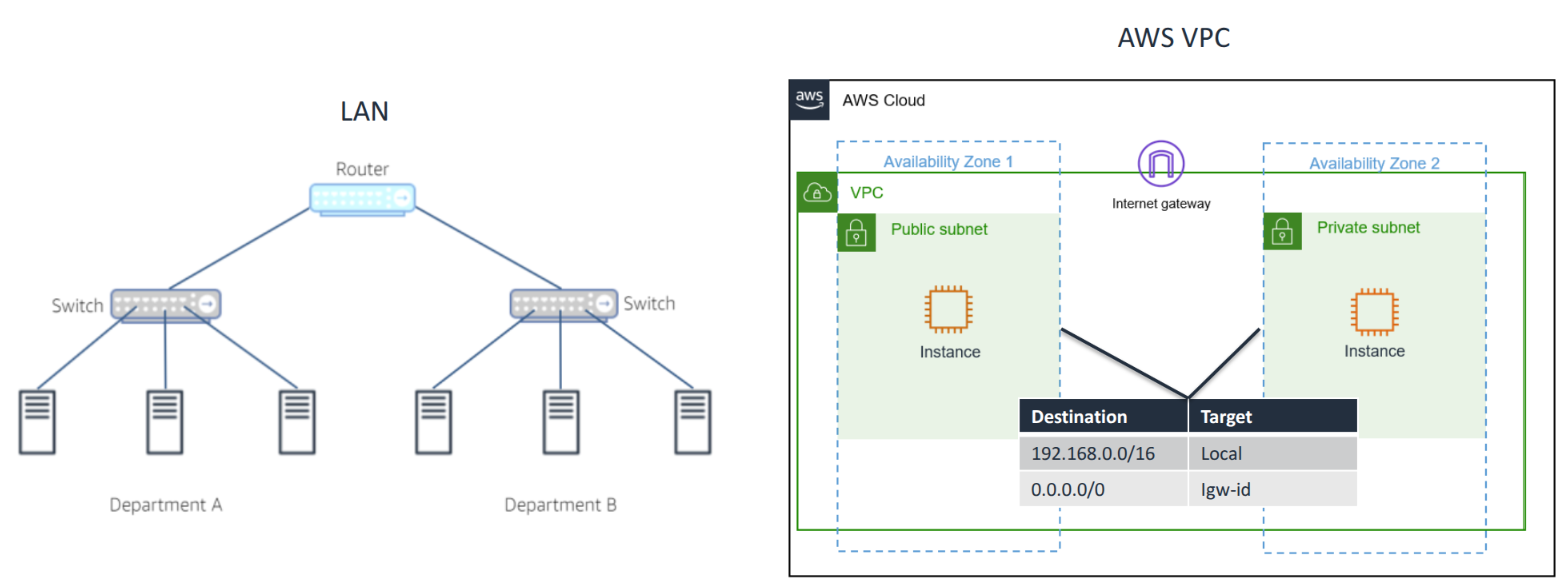

### WAN vs AWS VPC

| **Aspect**        | **WAN (Wide Area Network)**                                                      | **AWS VPC (Virtual Private Cloud)**                                                            |
| ----------------- | -------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- |
| **Scope**         | Large geographical area; interconnects LANs (e.g., the Internet, MPLS networks). | Virtual network within AWS region; isolated but can connect to WAN/Internet.                   |
| **Ownership**     | Usually managed by ISPs or enterprises across multiple locations.                | Fully managed by AWS customer (you) in the cloud.                                              |
| **Connectivity**  | Uses leased lines, fiber optics, satellites, ISPs.                               | Uses AWS backbone; can connect to WANs via VPN or AWS Direct Connect.                          |
| **IP Addressing** | Mix of private & public IPs across organizations.                                | Private IPs inside VPC; public IPs assigned for Internet access.                               |
| **Security**      | Needs firewalls, VPNs, encryption across untrusted networks.                     | Built-in isolation by default; VPN/Direct Connect extends securely to WAN.                     |
| **Use Case**      | Connecting branch offices worldwide, enterprise networks.                        | Isolated cloud environment, extendable into corporate WAN via VPN.                             |
| **Scenario**      | A multinational company connecting offices globally with MPLS WAN.               | Same company creating a VPC for hosting apps, then connecting it to HQ via VPN/Direct Connect. |

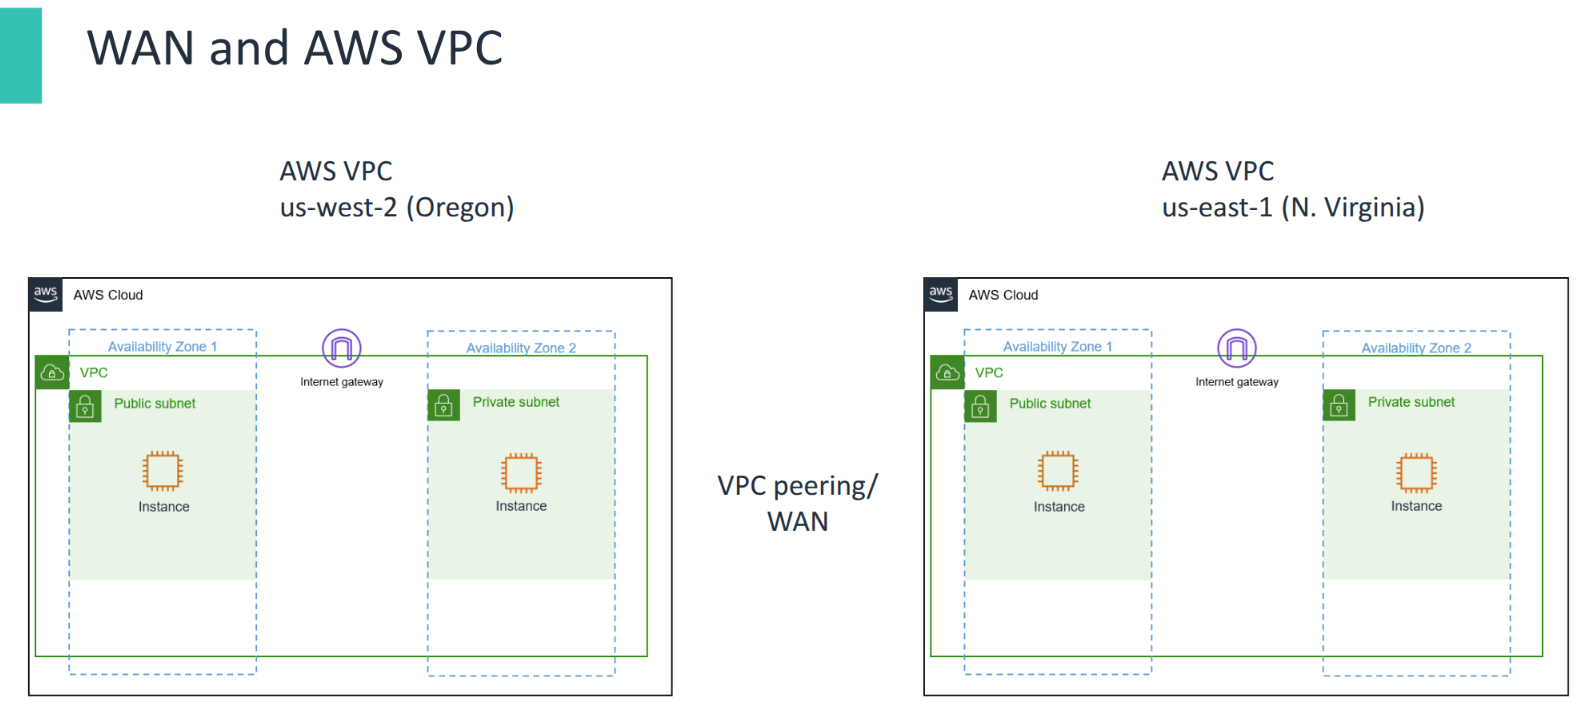

### Network Management

#### Client-Server Model

- Data management and application hosting are centralized to the server and distributed to clients.
- No client can access when server goes down.

#### Peer-to-peer Model

- Each node has its own data and applications and is responsible for its own management and security.
- Peers are equally priviledged.

### Network Protocols

#### **Internet Protocol** 

- Establishes rules for relaying and routing data in the internet (Connection-oriented).

#### **Transmission Control Protocol** 

- Reliable connection-oriented and ordered delivery of bitstreams over an IP network.

##### TCP Handshake 

- Host A sends SYN to Host B to connect.
- Host B sends SYN with an ACK to acknowledge that the message was received.
- Host A sends the last ACK to Host B to let it know the SYN/ACK was received.

- The process also gracefully closes the communication with three separate messages: **FIN**, **FIN/ACK**, **ACK**.
- There are also something called reset (**RST**) flags when a connection closes abruptly and causes and error.
- `wireshark` or `tcpdump` is used to undestand where your packets are getting lost in communication. This is useful in troubleshooting.


#### **TCP/IP** 

- Combined to implement set of protocols the internet runs on.
- Data sent via this protocol is broken down into smaller chunks called packets. 
- The goal of TCP/IP was to support an interconnection of networks (internet).

#### **User Datagram Protocol** 

- Deliver data over an IP network where it does not need to start a session/communication. (Connectionless)
    - Does not guarantee delivery of ordering of data. Faster compared to TCP.

## Internet Protocol

- Uses **IP Address** to identify devices
- Uses **port numbers** to identify endpoints
- Supports **subnetting** to divide a network.

### IP Address

- Identifies a **host** and a **network**.
- Also used for **location addressing**.

- Can be **public** (accessed over internet) or **private**.
- Can be **dyanmic** (assigned IP can change) or **statics**.

### [RFC 1918](https://datatracker.ietf.org/doc/html/rfc1918)

| **Class**   | **Private Range**             | **CIDR Notation** | **# of Addresses** | **Typical Usage**                  |
| ----------- | ----------------------------- | ----------------- | ------------------ | ---------------------------------- |
| **Class A** | 10.0.0.0 – 10.255.255.255     | `10.0.0.0/8`      | 16,777,216         | Very large enterprises, cloud VPCs |
| **Class B** | 172.16.0.0 – 172.31.255.255   | `172.16.0.0/12`   | 1,048,576          | Mid-sized organizations            |
| **Class C** | 192.168.0.0 – 192.168.255.255 | `192.168.0.0/16`  | 65,536             | Home/office LANs, Wi-Fi routers    |


### IPv4 Address Classes

| **Class** | **Range (First Octet)** | **Network/Host Bits**   | **Default Subnet Mask** | **Total Networks**   | **Hosts per Network** | **Usage**             |
| --------- | ----------------------- | ----------------------- | ----------------------- | -------------------- | --------------------- | --------------------- |
| **A**     | 1 – 126                 | 8 network / 24 host     | 255.0.0.0 (/8)          | 128 (minus reserved) | \~16 million          | Very large networks   |
| **B**     | 128 – 191               | 16 network / 16 host    | 255.255.0.0 (/16)       | 16,384               | \~65,000              | Medium networks       |
| **C**     | 192 – 223               | 24 network / 8 host     | 255.255.255.0 (/24)     | 2 million+           | 254                   | Small networks        |
| **D**     | 224 – 239               | Reserved (Multicast)    | N/A                     | N/A                  | N/A                   | Multicast groups      |
| **E**     | 240 – 255               | Reserved (Experimental) | N/A                     | N/A                  | N/A                   | Research/experimental |


#### Special IP Addresses

- `0.0.0.0/8` - "This network"" (default route).
- `127.0.0.1` or `127.0.0.0/8` is the **loopback address** (aka localhost).
- `169.254.0.0/16` is auto-assigned when DHCP fails (Windows calls it APIPA).
- `224.0.0.0 – 239.255.255.255` is used for one-to-many communication.
- TEST-NET ranges for documentation/examples:
    - `192.0.2.0/24`
    - `198.51.100.0/24`
    - `203.0.113.0/24`

#### Mapping Private IP Address to Public IP Address

- This is done through **Network Address Translation** (NAT)
- It is a networking technique that allows multiple devices on a private network to share a single public IP address when accessing the internet.
- The process is done by the **router**.

### Troubleshooting with IP Addresses

- **latency** - An app takes a long time to load. When troubleshooting, use `traceroute` to report the path of the packet from source to destination.
    - Each server is called a **hop** and it checks for pocket loss as well.
- **Server not responding to requests** - Use `ping` to send packets to the IP address. If it fails, then the packets either have no rout to the network of the address, or another layer 3 problem.

### IPv6

- Extends IPv4 by **1028** times.
- Group of **hex** numbers separated by eight *colons*.
- Identifies both the network and the device on the network.

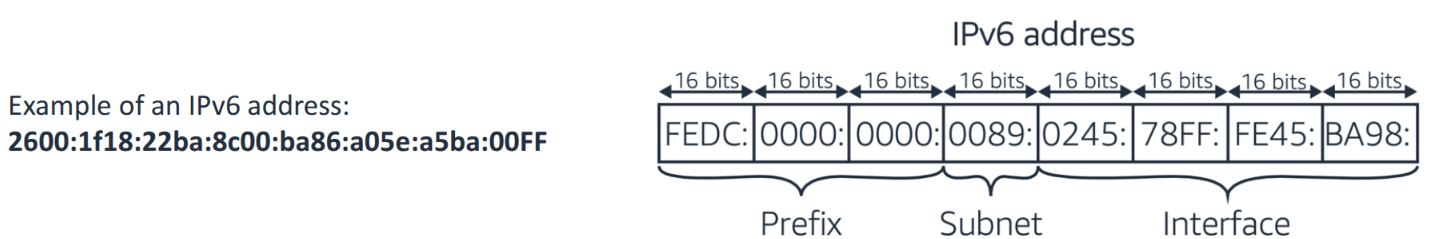

- **8** groups of **4**
- Each character in the 4-letter group is a hex (2^**4**).
- 8 x 4 x 4 = 128
- 2^128 = 3.4 × 10³⁸ addresses

### Port Numbers

| **Port Number** | **Protocol**   | **Direction**                                                                     | **Usage**                                        |
| --------------- | -------------- | --------------------------------------------------------------------------------- | ------------------------------------------------ |
| **20**          | FTP (Data)     | Server → Client (sending)                                                         | Transfers files (data channel).                  |
| **21**          | FTP (Control)  | Client → Server (sending), Server → Client (receiving commands)                   | FTP command/control channel.                     |
| **22**          | SSH            | Client → Server (sending), Server → Client (receiving)                            | Secure remote login, file transfer (SCP/SFTP).   |
| **23**          | Telnet         | Client → Server                                                                   | Remote terminal access (unsecured, legacy).      |
| **25**          | SMTP           | Client (Mail server) → Server (Mail server)                                       | Email transmission between servers.              |
| **53**          | DNS            | Client → Server (UDP/TCP)                                                         | Domain name resolution.                          |
| **67**          | DHCP Server    | Server → Client                                                                   | Assigns IP addresses (offers).                   |
| **68**          | DHCP Client    | Client → Server                                                                   | Requests IP addresses.                           |
| **69**          | TFTP           | Client ↔ Server (UDP)                                                             | Simple file transfers (no authentication).       |
| **80**          | HTTP           | Client → Server (sending request), Server → Client (receiving + sending response) | Web traffic (unencrypted).                       |
| **110**         | POP3           | Client → Server                                                                   | Email retrieval (from server).                   |
| **143**         | IMAP           | Client → Server                                                                   | Email retrieval/sync.                            |
| **161**         | SNMP (Agent)   | Client → Server                                                                   | Network device monitoring.                       |
| **162**         | SNMP (Manager) | Server → Client                                                                   | SNMP traps/alerts.                               |
| **389**         | LDAP           | Client → Server                                                                   | Directory services (Active Directory, OpenLDAP). |
| **443**         | HTTPS          | Client → Server (sending request), Server → Client (receiving + sending response) | Secure web traffic (SSL/TLS).                    |
| **445**         | SMB            | Client ↔ Server                                                                   | File sharing (Windows).                          |
| **465 / 587**   | SMTP (Secure)  | Client → Server                                                                   | Email sending (encrypted).                       |
| **514**         | Syslog         | Client (device) → Server                                                          | Logging messages.                                |
| **993**         | IMAPS          | Client → Server                                                                   | Secure IMAP.                                     |
| **995**         | POP3S          | Client → Server                                                                   | Secure POP3.                                     |
| **1433**        | MS SQL Server  | Client → Server                                                                   | Database connections.                            |
| **1521**        | Oracle DB      | Client → Server                                                                   | Oracle database service.                         |
| **3306**        | MySQL          | Client → Server                                                                   | Database connections.                            |
| **3389**        | RDP            | Client → Server                                                                   | Remote Desktop Protocol (Windows).               |
| **5432**        | PostgreSQL     | Client → Server                                                                   | Database connections.                            |
| **6379**        | Redis          | Client → Server                                                                   | In-memory key-value store.                       |
| **8080**        | HTTP (Alt)     | Client → Server                                                                   | Alternate HTTP port.                             |


- **< 1024** = Well-known ports (standardized services).

- **1024–49151** = Registered ports (apps/vendors).

- **49152–65535** = Dynamic/Ephemeral ports (temporary, client-side).

## Network Error Codes

| **Code** | **Category**  | **Meaning**                | **Scenario / Example**                                  |
| -------- | ------------- | -------------------------- | ------------------------------------------------------- |
| **100**  | Informational | Continue                   | Client should continue with request.                    |
| **200**  | Success       | OK                         | Request succeeded, response returned.                   |
| **201**  | Success       | Created                    | Resource created (e.g., new DB entry via API).          |
| **301**  | Redirection   | Moved Permanently          | Resource permanently relocated (URL changed).           |
| **302**  | Redirection   | Found (Moved Temporarily)  | Resource temporarily at another location.               |
| **304**  | Redirection   | Not Modified               | Cached resource is still valid, no new download needed. |
| **400**  | Client Error  | Bad Request                | Malformed request (e.g., invalid syntax).               |
| **401**  | Client Error  | Unauthorized               | Missing/invalid authentication credentials.             |
| **403**  | Client Error  | Forbidden                  | Valid credentials, but no permission.                   |
| **404**  | Client Error  | Not Found                  | Resource doesn’t exist.                                 |
| **408**  | Client Error  | Request Timeout            | Client took too long to send a request.                 |
| **409**  | Client Error  | Conflict                   | Resource conflict (e.g., duplicate entry).              |
| **410**  | Client Error  | Gone                       | Resource was intentionally removed.                     |
| **429**  | Client Error  | Too Many Requests          | Rate limiting / throttling applied.                     |
| **500**  | Server Error  | Internal Server Error      | Generic error on the server side.                       |
| **502**  | Server Error  | Bad Gateway                | Gateway/proxy received invalid response.                |
| **503**  | Server Error  | Service Unavailable        | Server is overloaded or down.                           |
| **504**  | Server Error  | Gateway Timeout            | Gateway/proxy didn’t get timely response.               |
| **505**  | Server Error  | HTTP Version Not Supported | Server does not support the HTTP version.               |


## Networking in the AWS Cloud

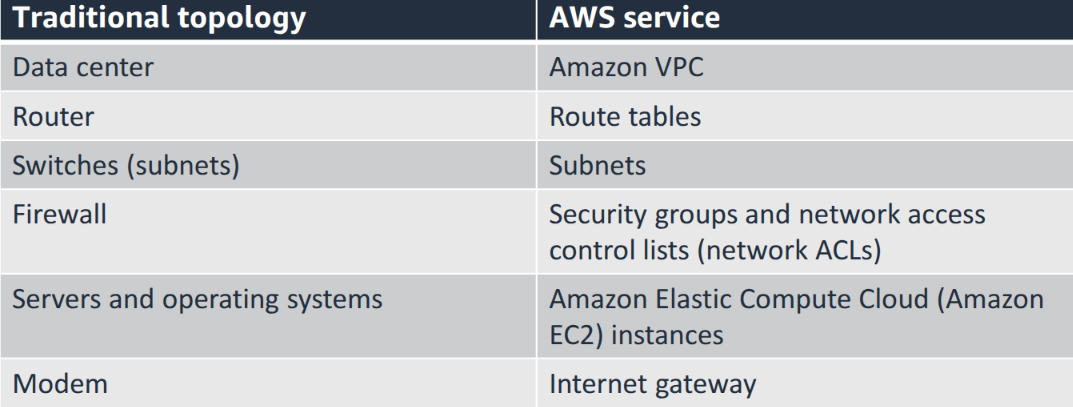

### Amazon VPC

- A service to provision a logically isolated section of the AWS cloud.
- Launch your AWS Services in a virtual network you define.

### What it can do?
- Gives the user the ability to:
    - Select IP Address range
    - Create subnets
    - Configure routing tables and network gateways.
- Gives the ability to customize its network configuration.
- Gives the ability to use multiple layers of security.

### Amazon VPC Features

- Has a dedicated AWS accountr, whoch gives you access to the AWS Cloud.
- Belongs to a single AWS Region.
- It can span multiple Availability Zones.
- Logically isolated fron other Amazon VPCs.

### IP Addressing in Amazon VPC

- The address range can be as big as /16 (65,536) down to /28 (16).
- Private IP Addresses based on RFC 1918.

#### [RFC 1918](https://datatracker.ietf.org/doc/html/rfc1918)

| **Class**   | **Private Range**             | **CIDR Notation** | **# of Addresses** | **Typical Usage**                  |
| ----------- | ----------------------------- | ----------------- | ------------------ | ---------------------------------- |
| **Class A** | 10.0.0.0 – 10.255.255.255     | `10.0.0.0/8`      | 16,777,216         | Very large enterprises, cloud VPCs |
| **Class B** | 172.16.0.0 – 172.31.255.255   | `172.16.0.0/12`   | 1,048,576          | Mid-sized organizations            |
| **Class C** | 192.168.0.0 – 192.168.255.255 | `192.168.0.0/16`  | 65,536             | Home/office LANs, Wi-Fi routers    |


### Private IP Address Range

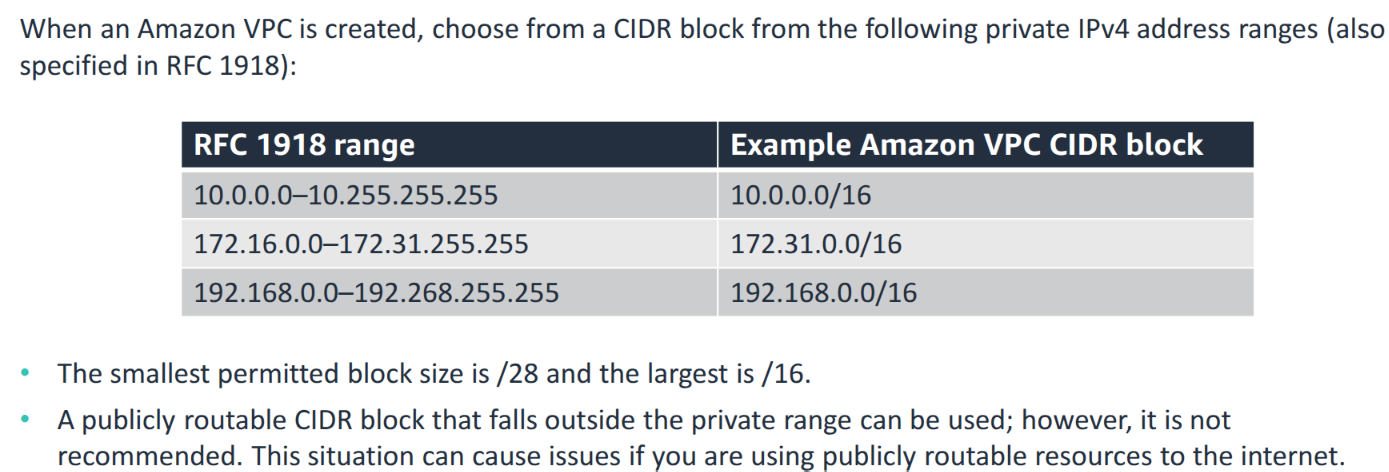

### Amazon VPC Components

- **CIDR Block** - A private range from /16 - /28 based on RFC 1918.
- **Subnets** - Allocate a range of IP Address within your VPC. Either public or private.
    - Public subnets have the route table with the internet gateway associated with them.
- **Route table** - Contains rules for the VPC to troute traffic. Targets are services (internet gateway, VPC endpoint, NAT gateway).
- **Internet gateway** - Attaches your VPC and allows communication from VPC to Internet. Must be created and attached to the VPC, and then added to the route table in order for the resources to reach the internet.
- **VPC Endpoint** - Private connection between services without the need of internet.
- **NAT gateway** - Attached to the private subnet to be converted to public address in orded to reach the internet.

- **Security groups** - Firewall at EC2 instance level. *Stateful* by nature.
- **Network ACLs** - Firewalls for subnets. *Stateless* by nature.

### Amazon VPCs How To

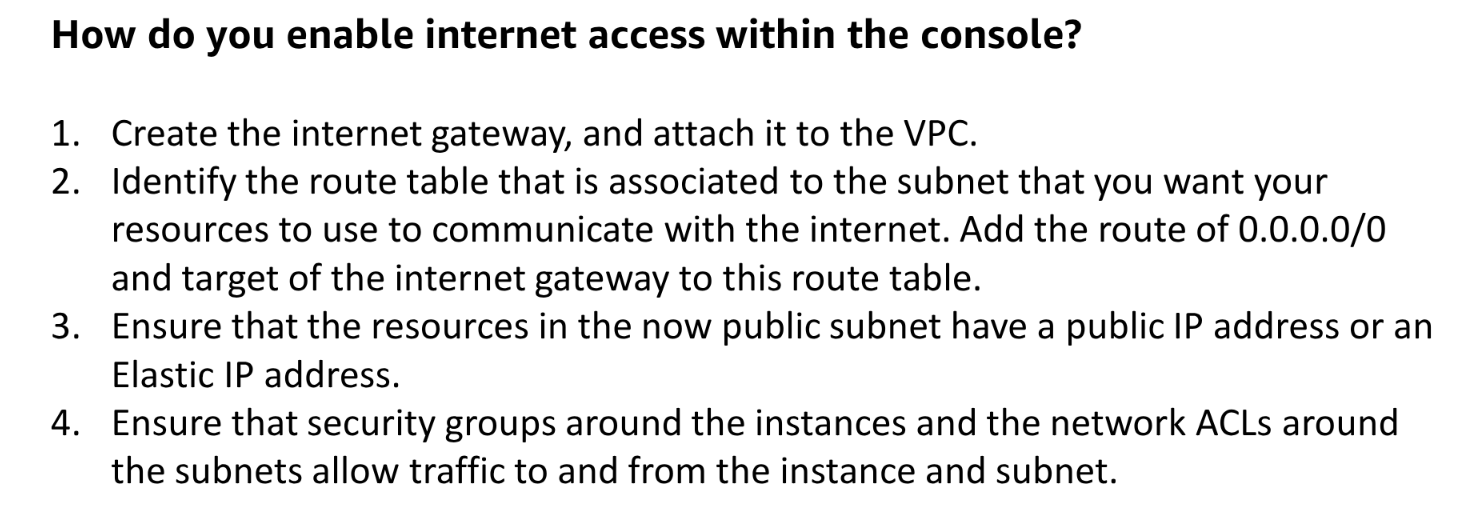

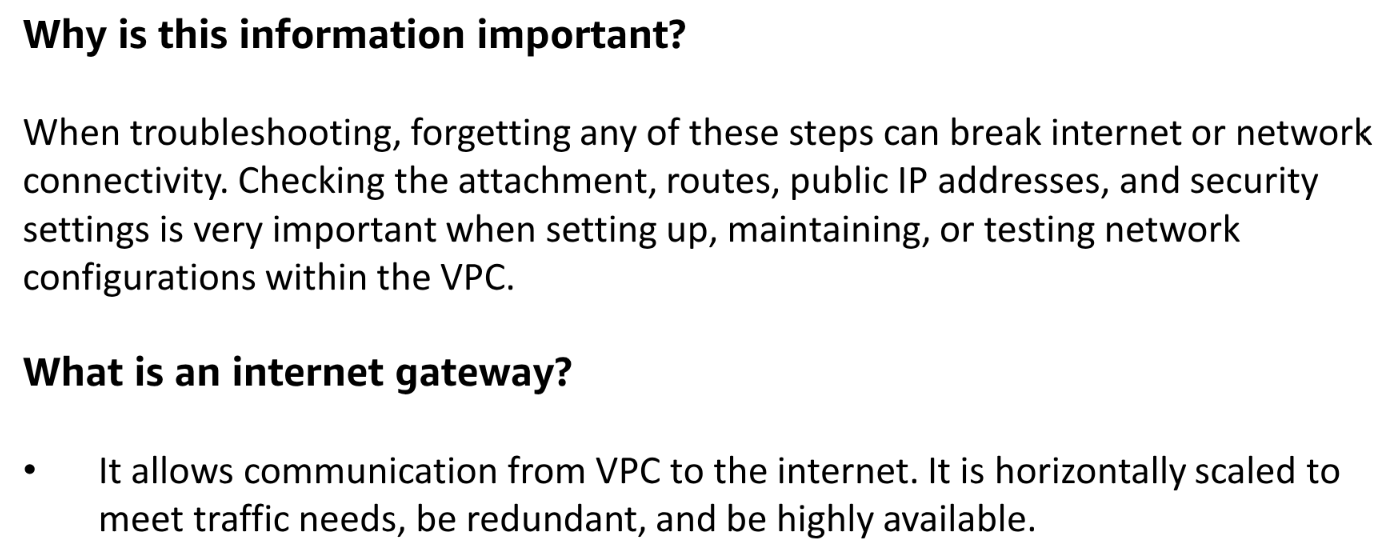

### NAT Gateway

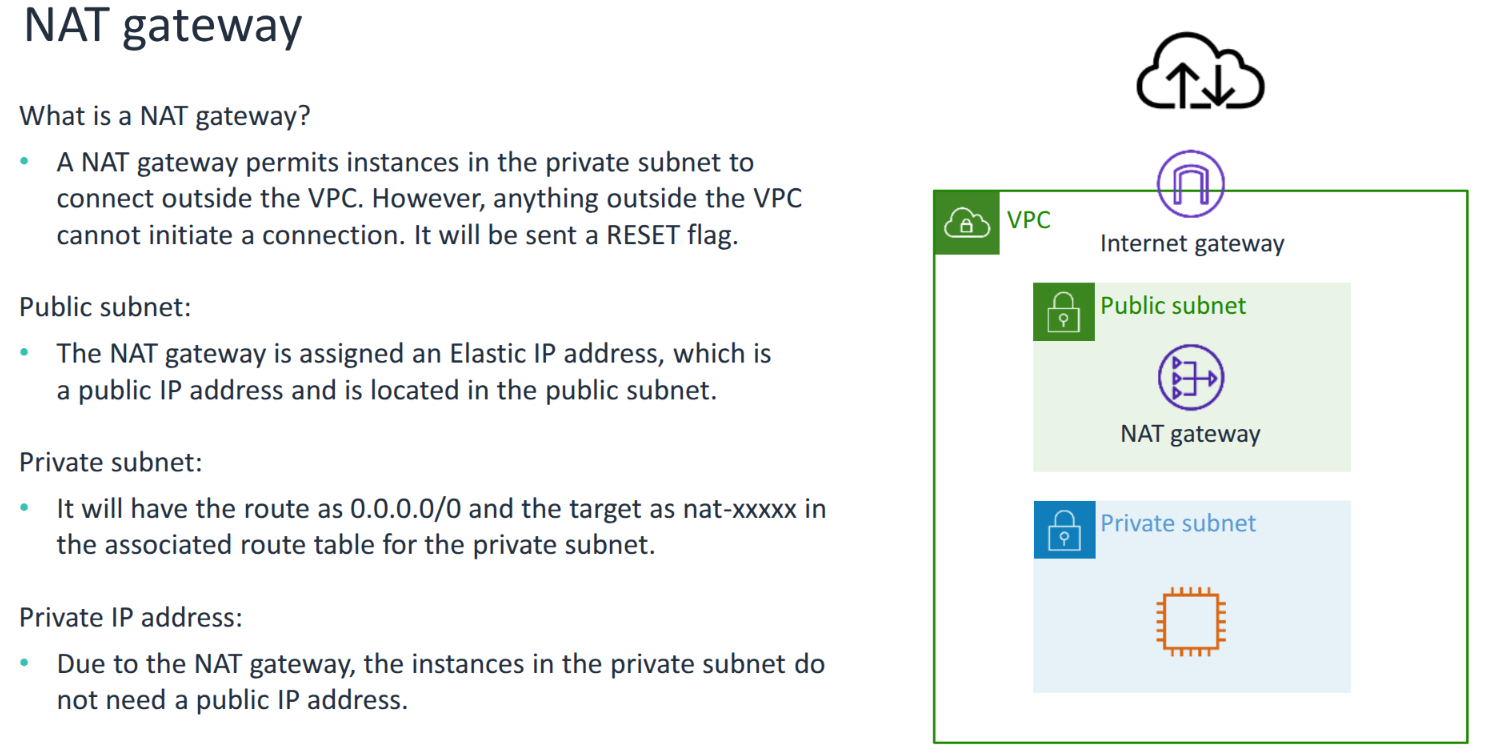

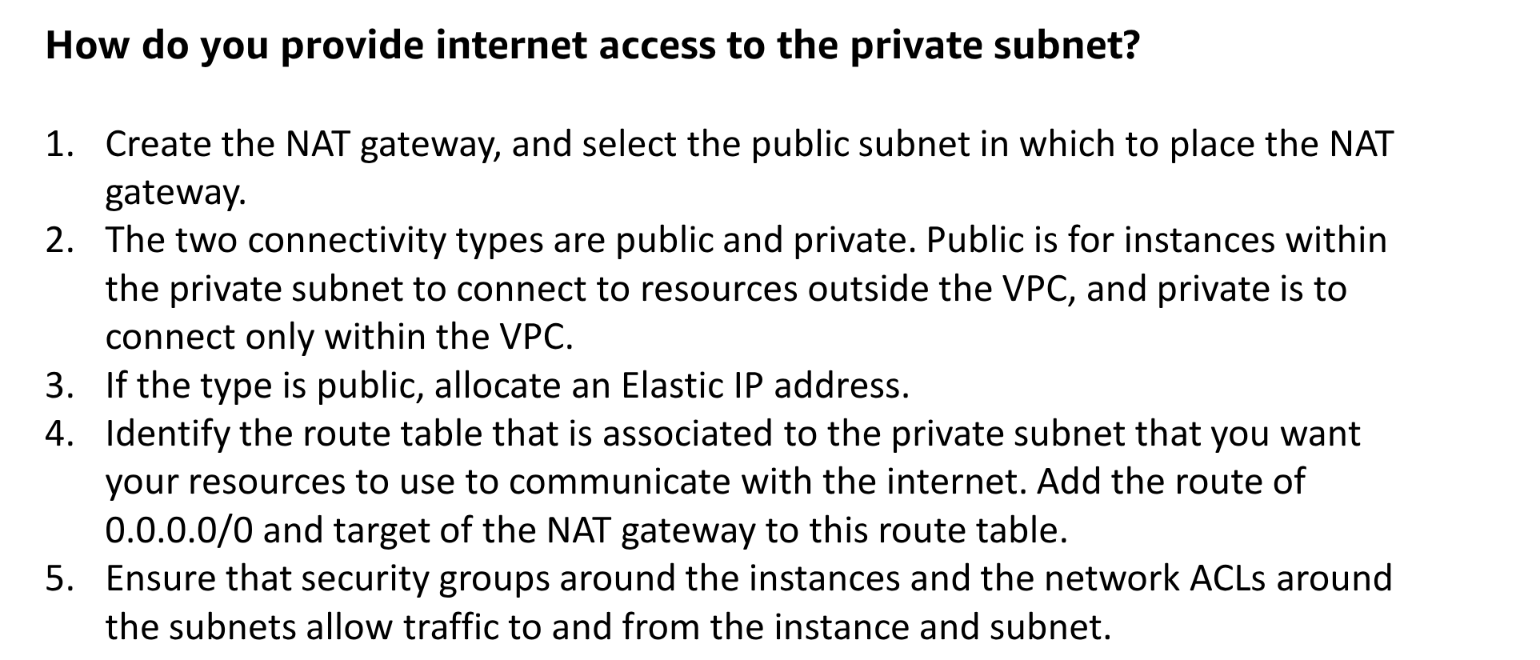

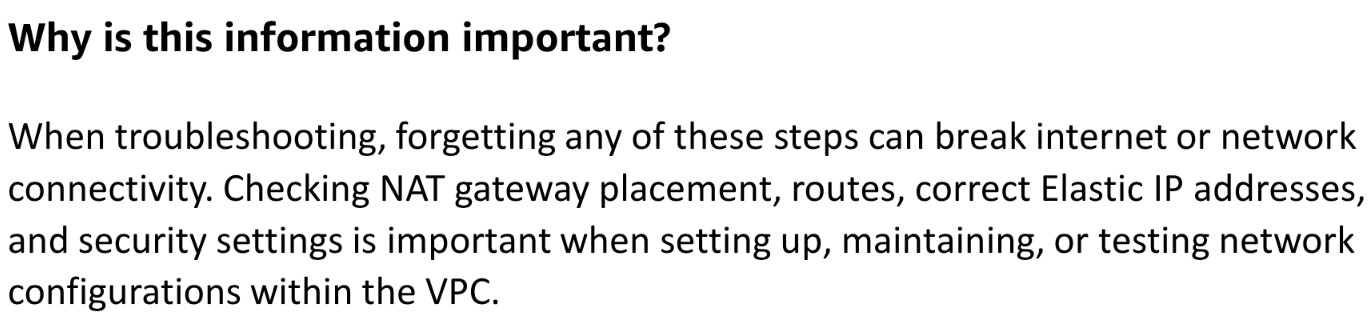

### Route Table

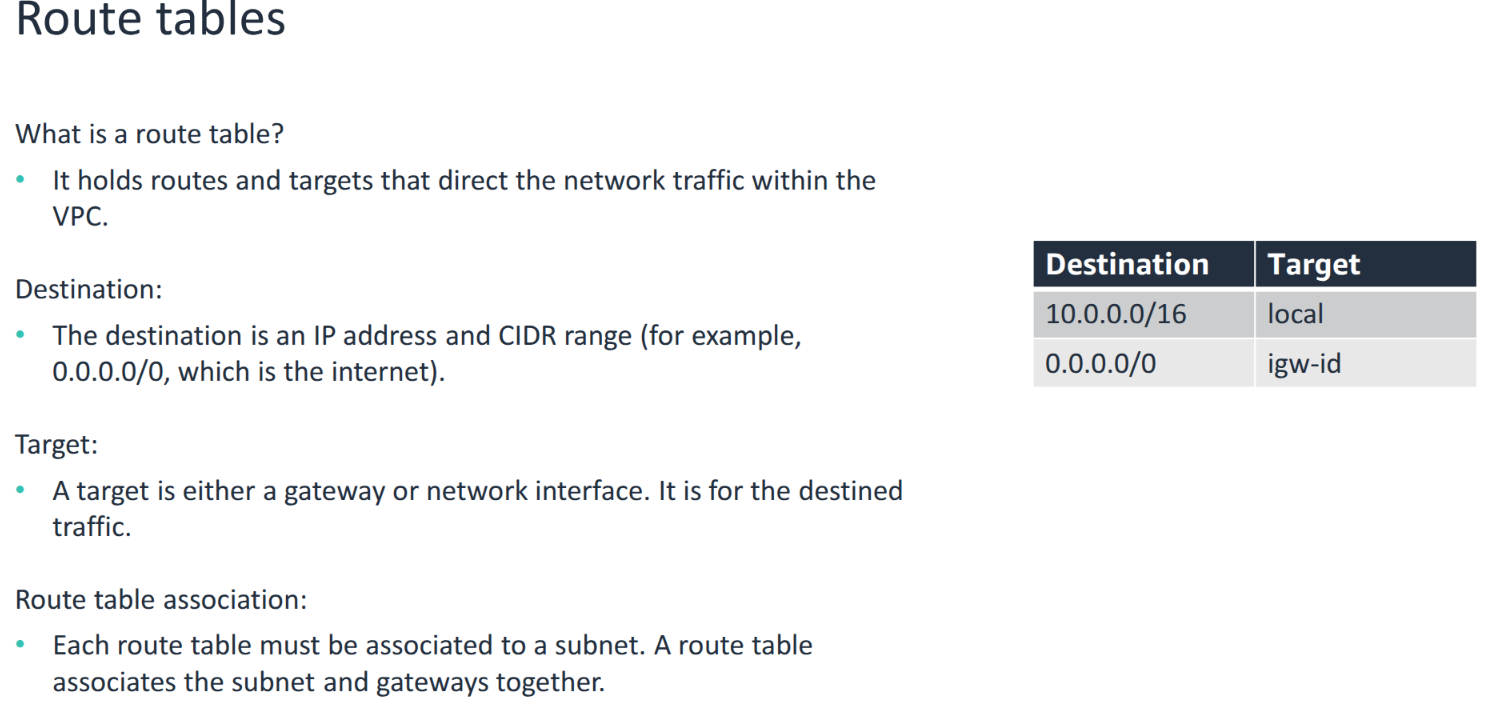

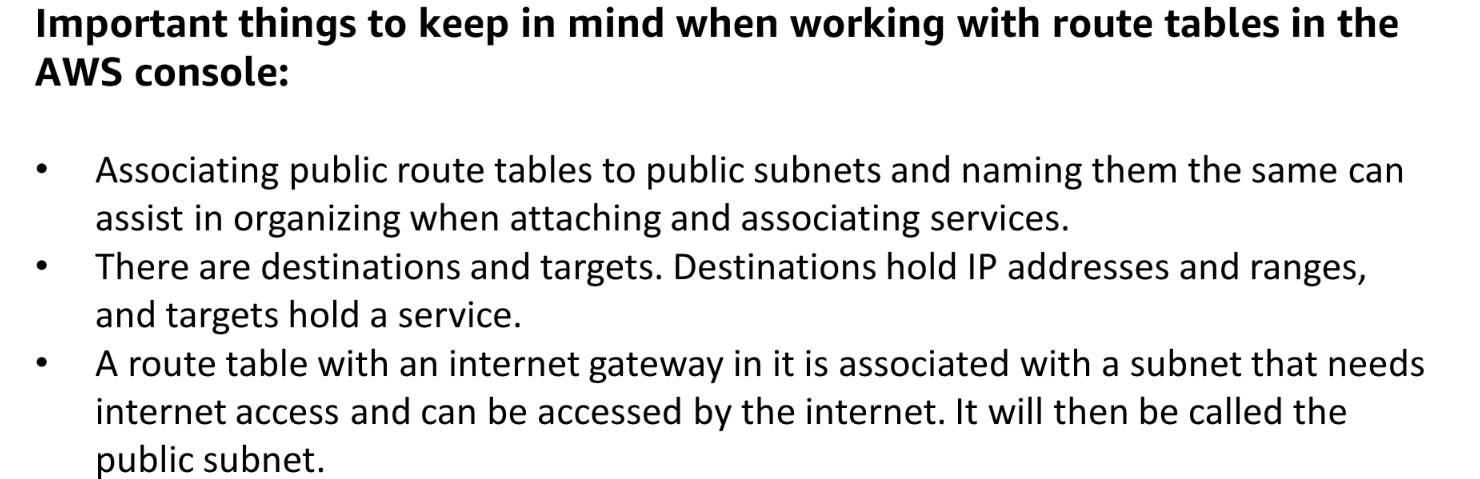

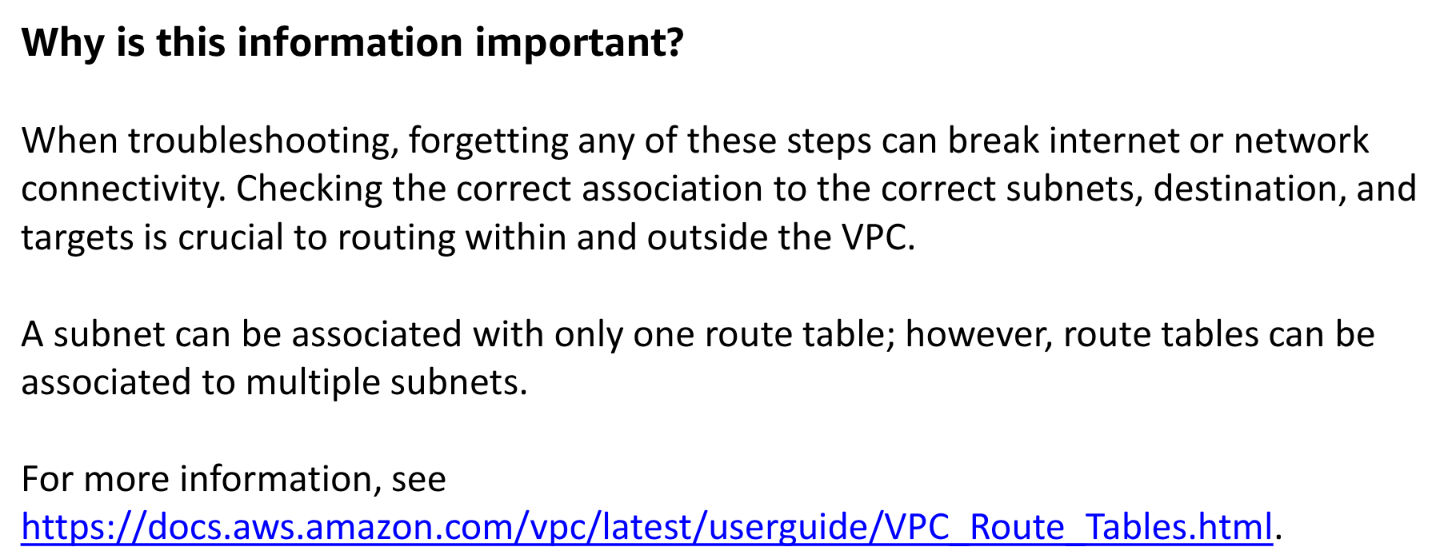

### Security Group

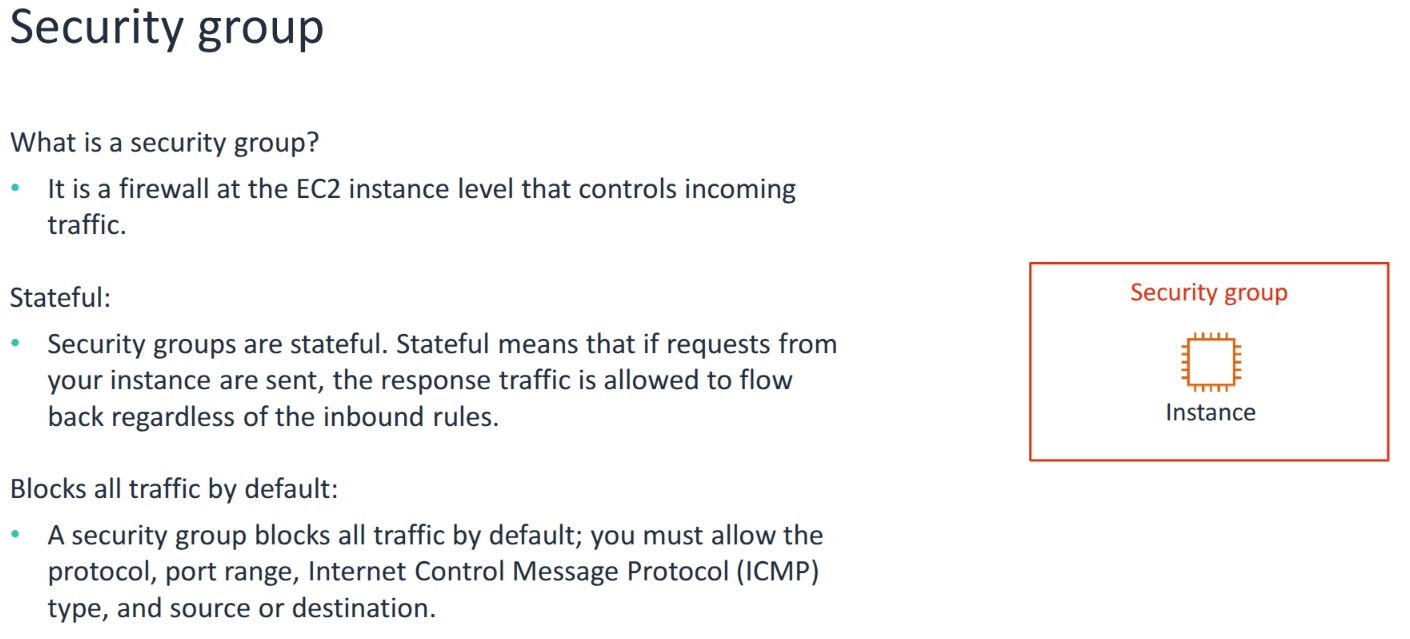

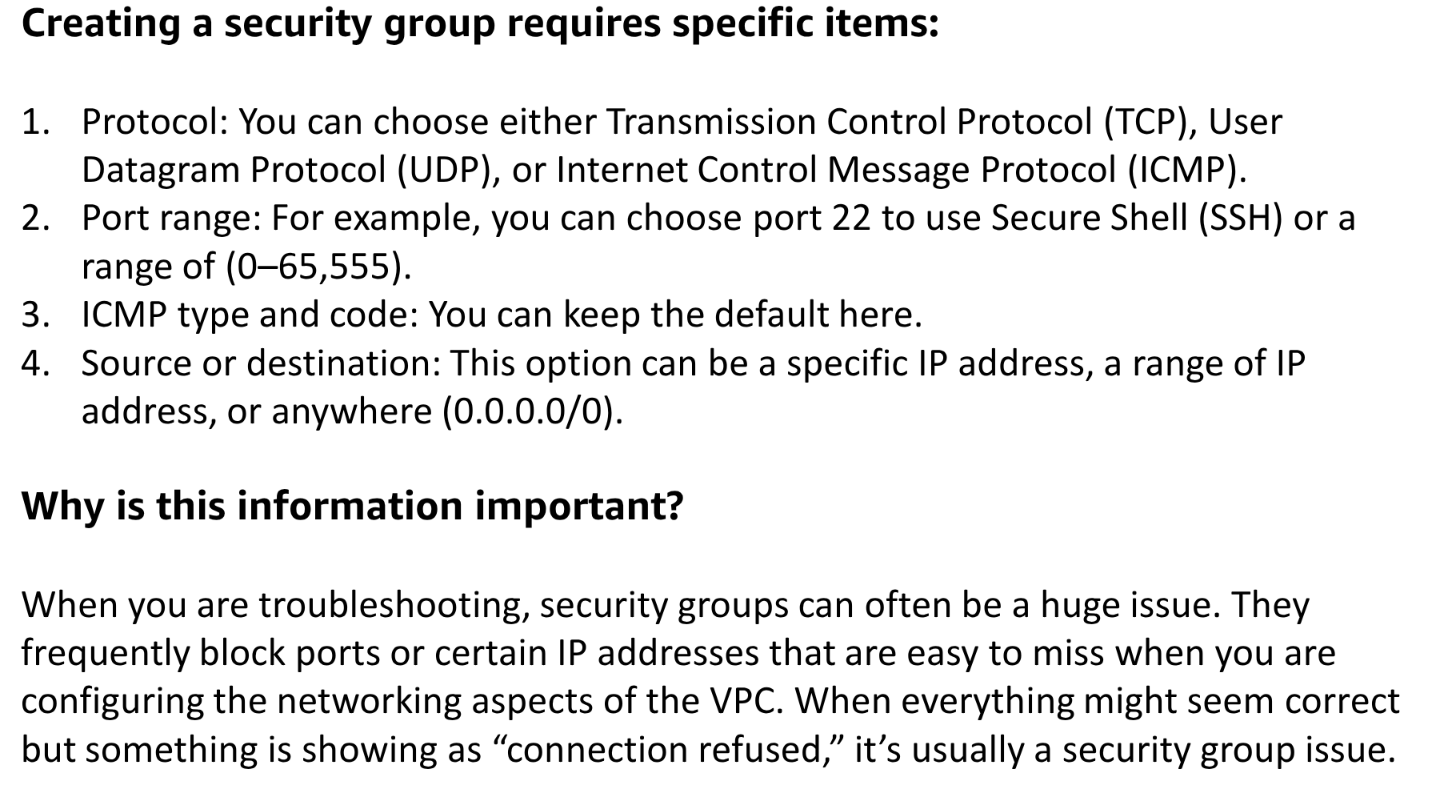

### Network ACL

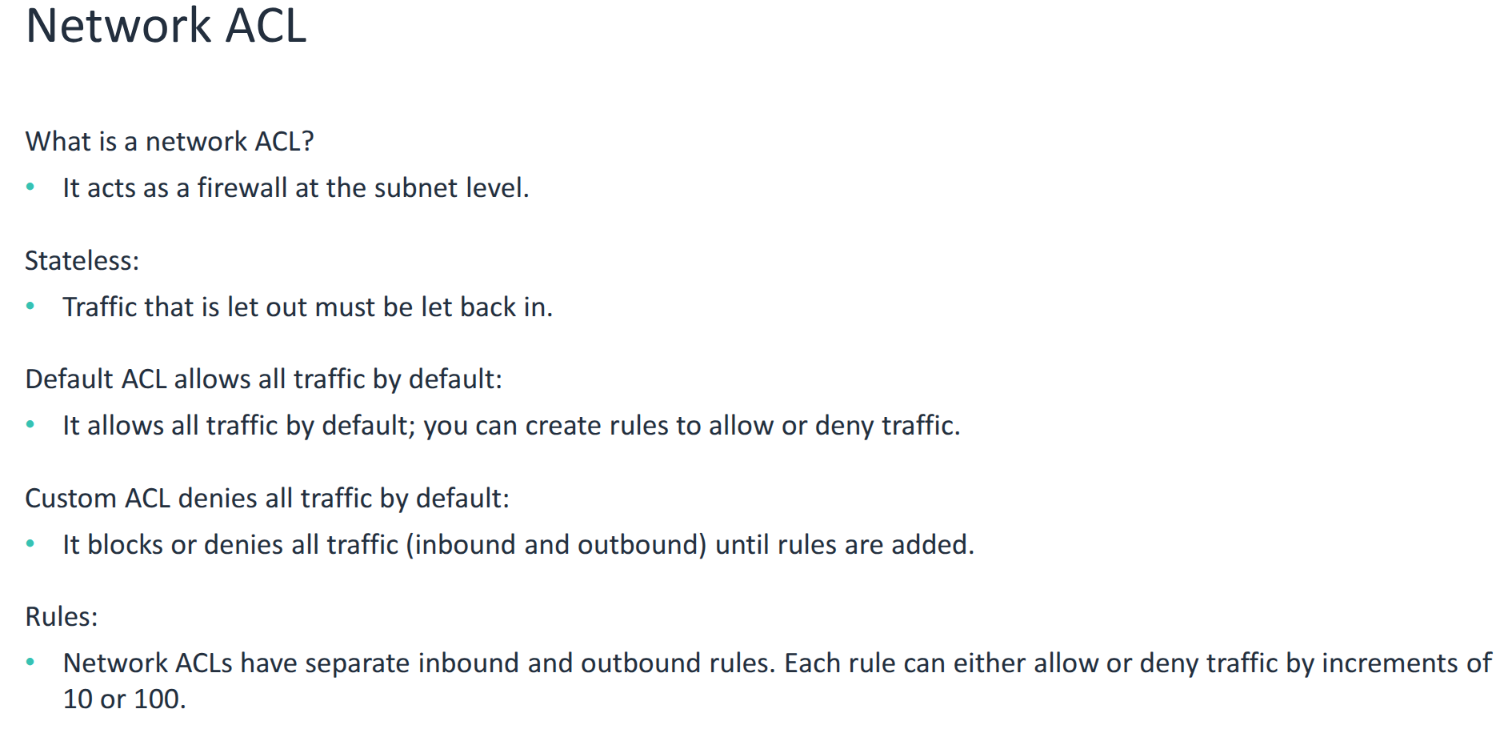

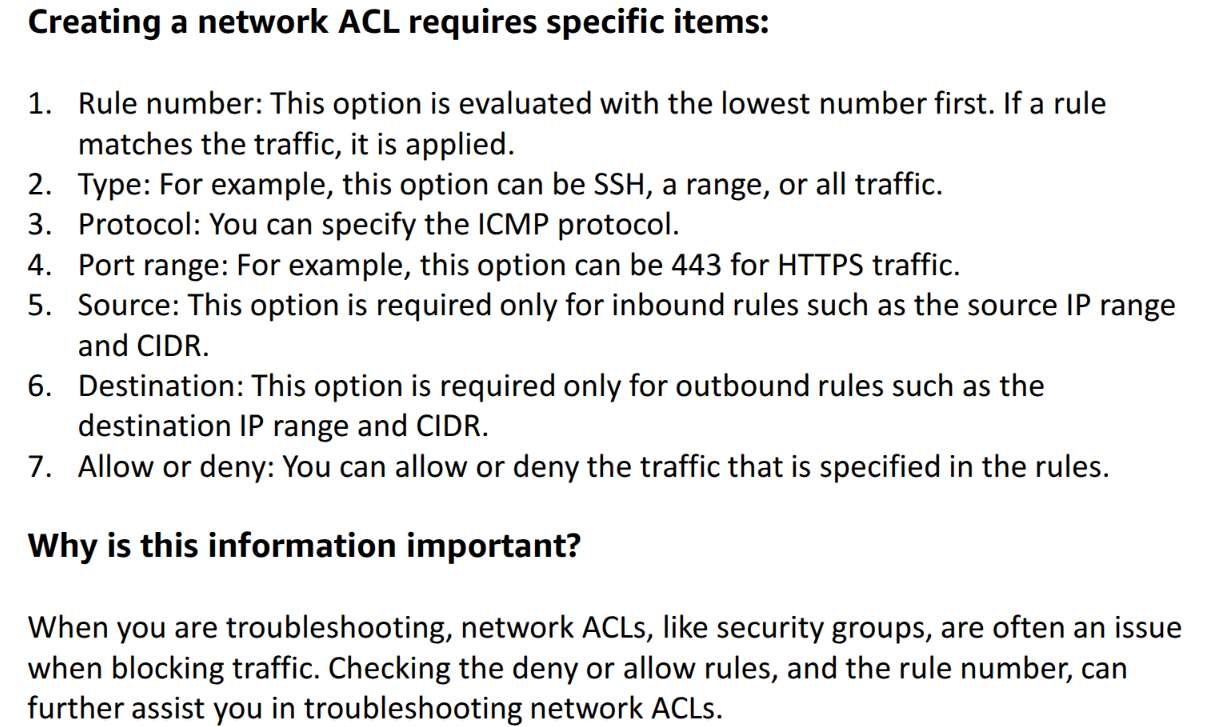

### More on Amazon VPC

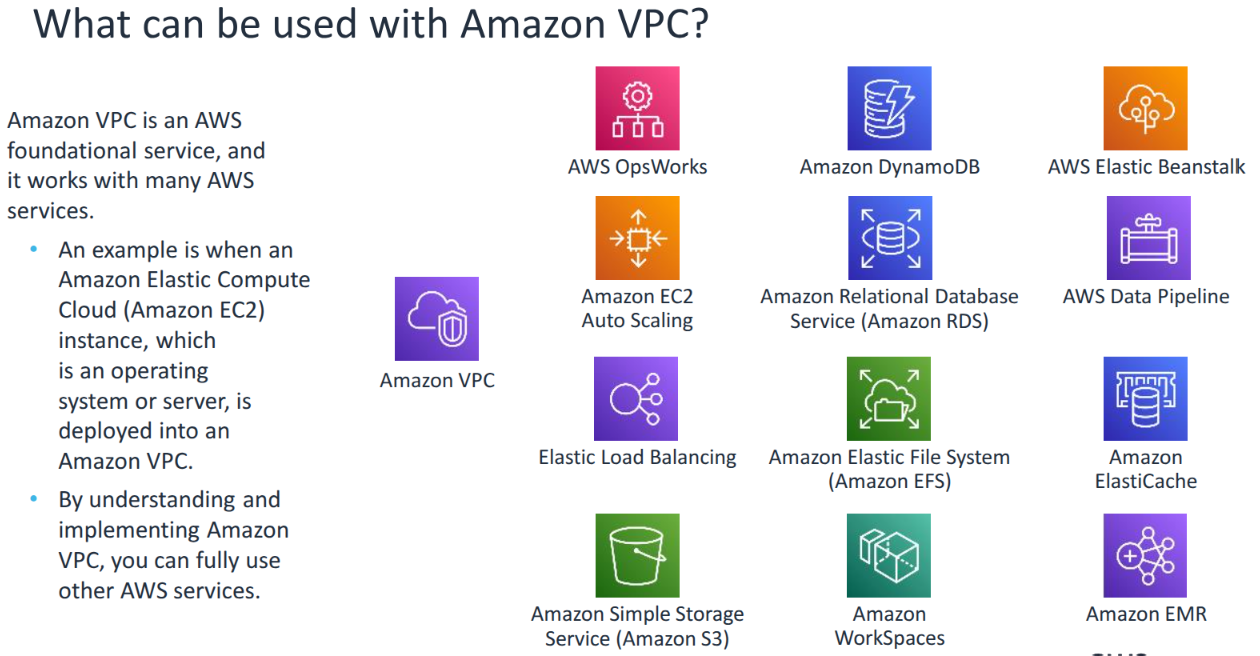

## IP Subnetting

- **Subnetting** is for logically paritioning a single physical network into multiple smaller subnetworks.
- Adds efficiency, conceals network complexity, and reduces network traffic.

#### Benefits of Subnetting

- maximize IP addressing efficiency
- Redice network traffic by eliminating collision and broadcast traffic
- Provide efficient application of network security policies at the interconnection between subnets.
- Facilitate spanning of large geographical distances.

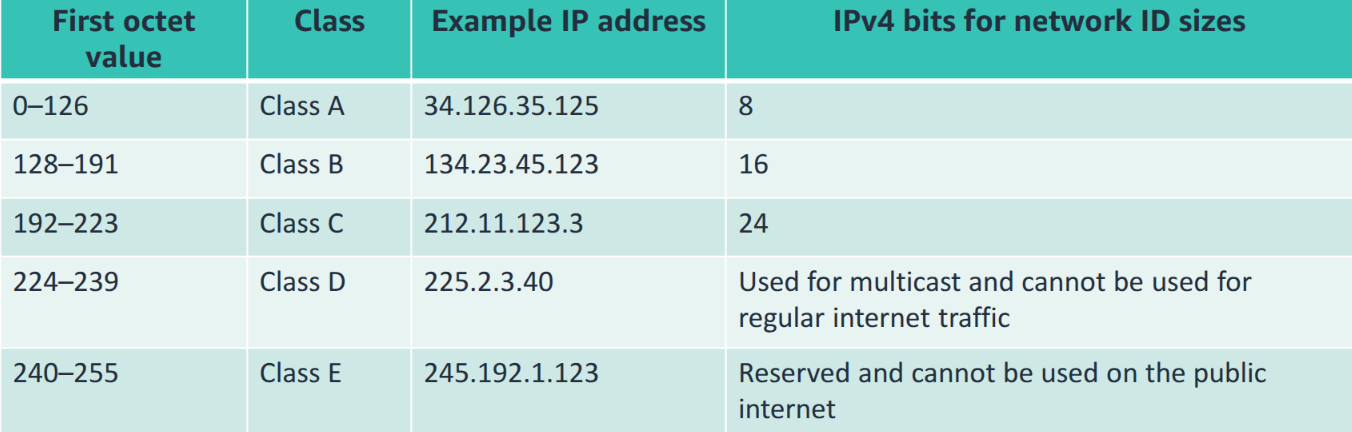

### Parts of a Subnet

- **Network ID** - Identifies the network
- **Subnet Mask** - Defines range of IP addresses that can be used within a network subnet.
- **Host ID Range** - Consists of all IP addresses between the subnet address and the broadcast address.
- **Number of usable host IDs** - Number of host minus 2 (network address and broadcast address).
- **Boradcast ID** - Target all systems on a specified subnet instead of a single host.

#### Subnet Mask
- Splits the IP address into the host and networks addresses. This identifies which belongs to a device, and which belongs to the network.
- Also covers the subnets so that it isn't seen outside of allowed traffic.

#### CIDR

255.255.255.0 --> /24

- You can create supernets, in addition to subdividing a network into several networks.

## Additional Networking Protocols

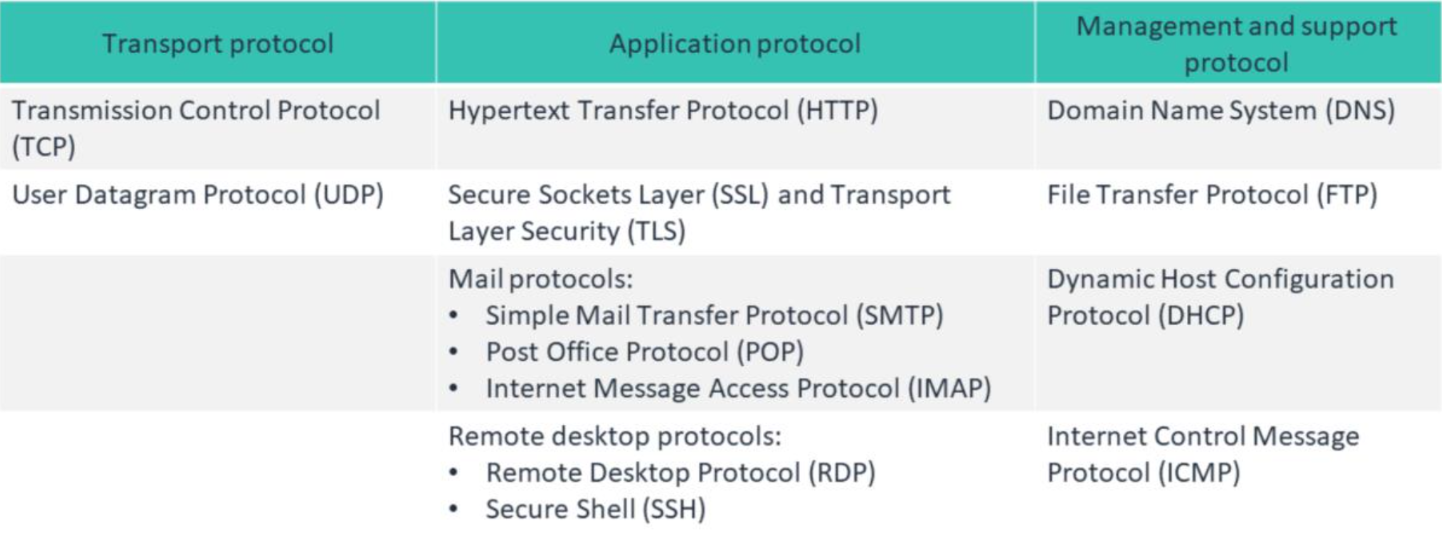

### TCP vs UDP

- TCP has **20** bytes of header size vs UDP **8** bytes.
- TCP waits for the handshake, whereas UDP does the sending immediately.

### Secure Sockets Layer (SSL)

- Standard for securing communications between two systems using **encryption**.

### Transport Layer Security (TLS)
- Updated version of SSL used by the Credit Card Payment industry.
- A **TLS Handshake** initiates a communicatiion session using TLS encryption.
- During this, the two communicating sides exchange messages to acknowledge and verify each other.
- They establish encryption algorithms that they will use and agree on session keys.

### RDP vs SSH
- RDP is used to access a **Windows** machine.
- SSH is used to access a **Linux** machine.

### DNS
- Database of domain names. Translates the human-readable domain names into machine-readable IP addresses.

### DHCP
- Dynamic Host Configuration Protocol
- Automatically assigns IP addresses, subent masks, gateways, and other IP parameters to devices connected to a network.

### FTP
- Network protocol that permits the transfer of files from one computer to another.

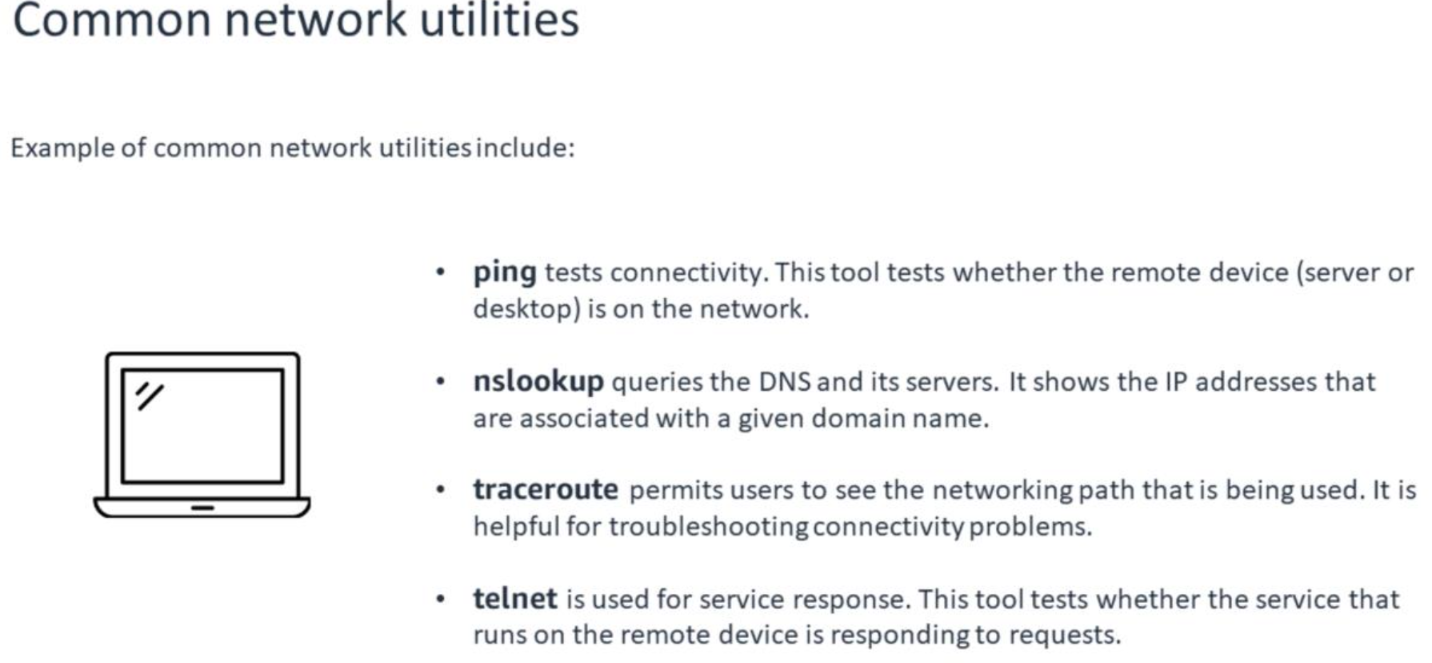

#### Q1 Which protocol defines how to establish and maintain network communications and also ensures that data packets are well delivered?

Transmission Control Protocol/Internet Protocol (TCP/IP)

#### Q2: Which protocol network devices diagnose network communication issues and generate responses to errors in IP networks?

Internet Control Message Protocol (ICMP) 

#### Q3: Which protocol can send mail from the client to a server or transfer email between email servers?
Simple Mail Transfer Protocol (SMTP)

#### Q4: Which command can test whether a port on a remote computer is open?
Telnet

#### Q5: A developer tries to initiate a connection to a company’s local File Transfer Protocol (FTP) server by using its IP address. However, the connection fails. As a result of the connection failure, the systems administrator decides to troubleshoot this issue for the developer. Which procedures can the administrator follow to troubleshoot the developer’s connection?
- Test server connectivity with the ping command.
- Check the firewall traffic rules to verify that port 21 is open.

## Additional Networking Technologies

### Wireless Technologies

#### Wired Equivalent Privacy
- Offers wireless protection and added secuirty to wireless networks by encrypting data.

#### Wi-Fi Protected Access
- Improvement of WEP in handling keys and user authorization

#### Bluetooth Low Energy
- Optimizes energy consumption
- Mobile applications and IoT. Developed initially for small periodic transfer of data over short ranges.

#### 5G Cellular Systems
- Download speeds up to 10 Gbps.

### IoT
- Physical devices that connect to the internet to share and collect data.
- Is about the ability to transfer data over a network without requiring human-to-human or human-to-computer interaction

#### MQTT
- Used by IoT devices to communicate.
- Publish-subscribe network protocol designed for connecting remote devices with resource constraints or limited network bandwidth.

### AWS IoT Core

- You can use AWS IoT Core to connect billions of IoT devices and route trillions of messages to different AWS services.
- Users can prefer their communication protocol: MQTT, HTTPS, LoraWAN, and WebSocket Secure (WSS).

### Enteprise Mobility

- Supports remote-working options.
- **Bring Your Own Device** - Use of personal device on a corporate network.
- **Mobile Device Management** - provide settings, software, and acces to data in a secure way that complies with their needs.

#### Amazon Workspaces

- Provisions cloud-based Windows/Linux desktops for their users.
- Uses either AWS Directory Service or AWS Director Service for Microsoft Active Directory for user authentication.
- Deploy and manage with **Amazon Workspaces Application Manager**.

- Customers can increase the size of the root and user volumes for a wrokspace, up to 100GB each.
- One request every 6-hour period.
- Customers CANNOT decrerase the size of the root to ensure data is preserved.